In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('files/new_train.csv',index_col=0)
df.head()

,Survived,Pclass,Name,Fare,Family,ISALONE,Age_2,C,E,G,...,T,Mr,Mrs,Miss,Master,Royality,S_EMB,C_EMB,Q_EMB,Sex
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",7.2500,2,0,22,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,2,0,38,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",7.9250,1,1,26,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,2,0,35,1,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,3,"Allen, Mr. William Henry",8.0500,1,1,35,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [5]:
len(df)

1309

In [6]:
df_train =  df.loc[:891]

In [7]:
df_train

,Survived,Pclass,Name,Fare,Family,ISALONE,Age_2,C,E,G,...,T,Mr,Mrs,Miss,Master,Royality,S_EMB,C_EMB,Q_EMB,Sex
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",7.2500,2,0,22,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,2,0,38,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",7.9250,1,1,26,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,2,0,35,1,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,3,"Allen, Mr. William Henry",8.0500,1,1,35,0,0,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",13.0000,1,1,27,0,0,1,...,0,0,0,0,0,1,1,0,0,1
888,1,1,"Graham, Miss. Margaret Edith",30.0000,1,1,19,0,0,0,...,0,0,0,1,0,0,1,0,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",23.4500,4,0,29,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [8]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Fare', 'Family', 'ISALONE', 'Age_2', 'C',
       'E', 'G', 'D', 'A', 'B', 'F', 'T', 'Mr', 'Mrs', 'Miss', 'Master',
       'Royality', 'S_EMB', 'C_EMB', 'Q_EMB', 'Sex'],
      dtype='object')

In [9]:
df_train = df_train[['Survived', 'Pclass','Fare', 'Family', 'ISALONE', 'Age_2', 'C',
       'E', 'G', 'D', 'A', 'B', 'F', 'T', 'Mr', 'Mrs', 'Miss', 'Master',
       'Royality', 'S_EMB', 'C_EMB', 'Q_EMB', 'Sex']]

In [10]:
df_train.isna().any()

Survived    False
Pclass      False
Fare        False
Family      False
ISALONE     False
Age_2       False
C           False
E           False
G           False
D           False
A           False
B           False
F           False
T           False
Mr          False
Mrs         False
Miss        False
Master      False
Royality    False
S_EMB       False
C_EMB       False
Q_EMB       False
Sex         False
dtype: bool

In [11]:
X=df_train.drop('Survived', axis = 1)
y=df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [13]:
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [14]:
stand = StandardScaler().fit(X_train)

X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

In [15]:
score = []

X_trains = [X_train, X_train_norm, X_train_stand]
X_tests = [X_test, X_test_norm, X_test_stand]

In [16]:
for X_train_set, X_test_set in zip(X_trains, X_tests):
    svc = SVC()
    svc.fit(X_train_set, y_train)
    y_pred = svc.predict(X_test_set)
    score.append(accuracy_score(y_test, y_pred))

In [17]:
pd.DataFrame({'score': score}, index=['Original', 'Normalized', 'Standardized'])

,score
Original,0.659218
Normalized,0.810056
Standardized,0.815642


<AxesSubplot:>

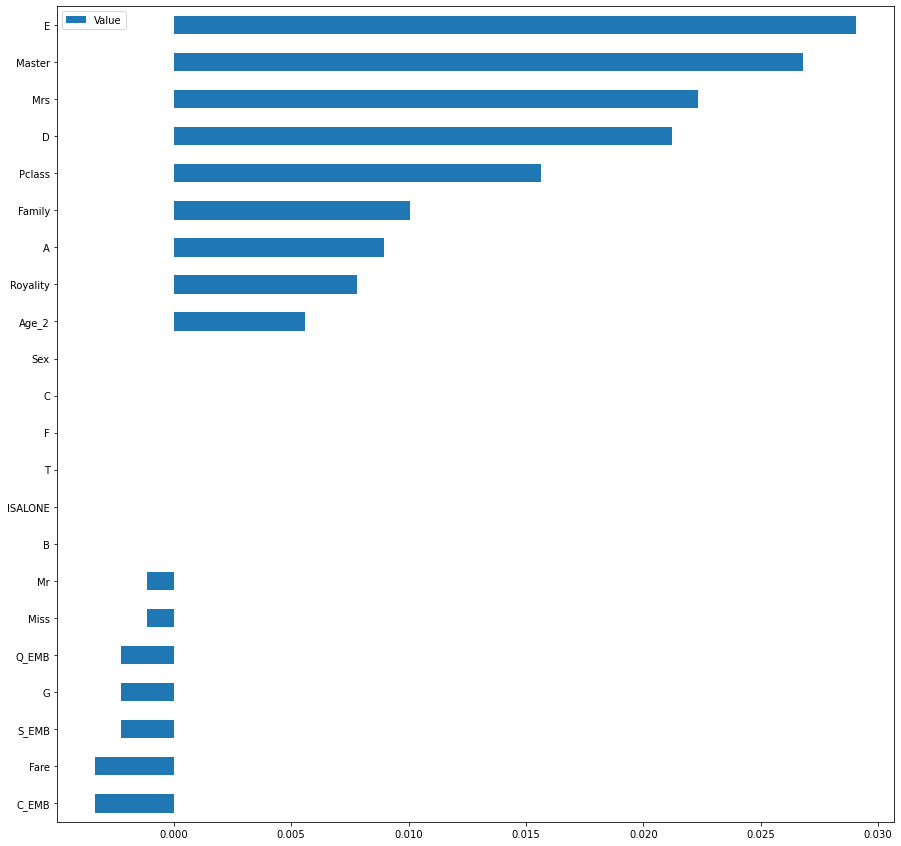

In [18]:
svc = SVC()
svc.fit(X_train_stand, y_train)

perm_importance = permutation_importance(svc, X_test_stand, y_test)
perm_importance.importances_mean
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])

df.plot.barh(figsize=[15, 15])

In [19]:
score = []
for X_train_set, X_test_set in zip(X_trains, X_tests):
    kn = KNeighborsClassifier()
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

In [20]:
pd.DataFrame({'score': score}, index=['Original', 'Normalized', 'Standardized'])

,score
Original,0.75419
Normalized,0.75419
Standardized,0.75419


<AxesSubplot:>

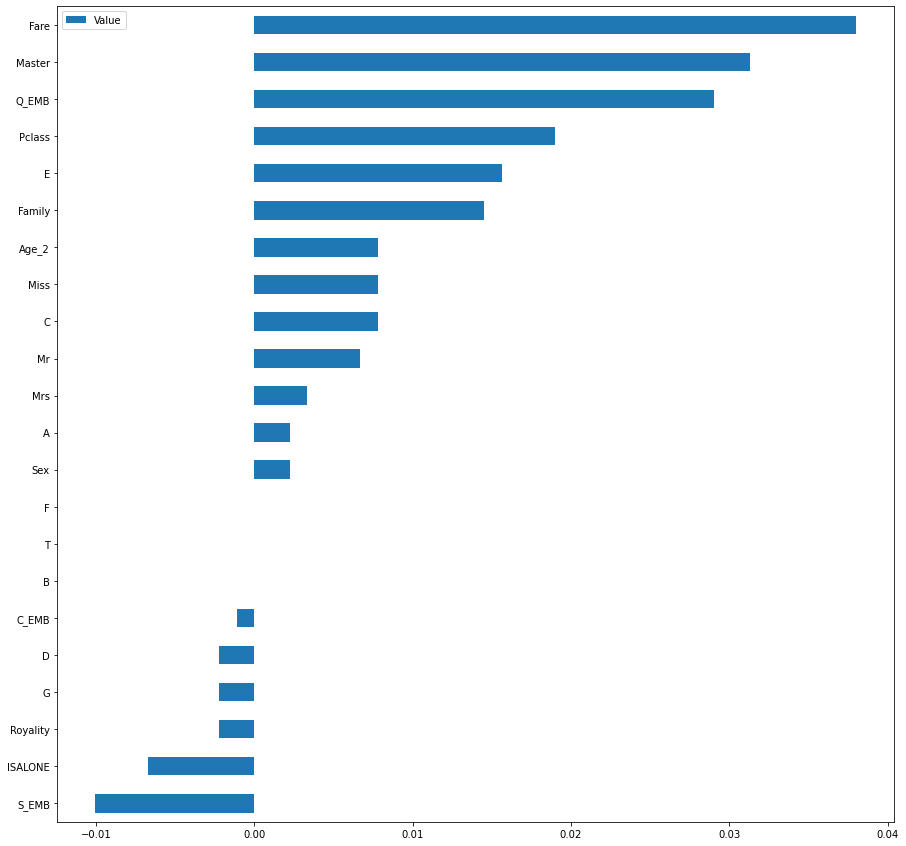

In [21]:
kn = KNeighborsClassifier()
kn.fit(X_train_stand, y_train)

perm_importance = permutation_importance(kn, X_test_stand, y_test)
perm_importance.importances_mean
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])

df.plot.barh(figsize=[15, 15])

In [22]:
df = pd.read_csv('files/new_train.csv',index_col=0)
df.head()

,Survived,Pclass,Name,Fare,Family,ISALONE,Age_2,C,E,G,...,T,Mr,Mrs,Miss,Master,Royality,S_EMB,C_EMB,Q_EMB,Sex
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",7.2500,2,0,22,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,2,0,38,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",7.9250,1,1,26,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,2,0,35,1,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,3,"Allen, Mr. William Henry",8.0500,1,1,35,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [23]:
df_test = df[['Survived', 'Pclass','Fare', 'Family', 'ISALONE', 'Age_2', 'C',
       'E', 'G', 'D', 'A', 'B', 'F', 'T', 'Mr', 'Mrs', 'Miss', 'Master',
       'Royality', 'S_EMB', 'C_EMB', 'Q_EMB', 'Sex']]

In [24]:
df_test = df_test.loc[892:]

In [25]:
X_train=df_train.drop('Survived', axis = 1)
y_train=df_train['Survived']
X_test=df_test.drop('Survived', axis = 1)
#y_test=df_train['Survived']

In [26]:
stand = StandardScaler().fit(X)

X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

In [27]:
svc = SVC()
svc.fit(X_train_stand, y_train)
y_pred = svc.predict(X_test_stand)

In [28]:
df_test['Survived2'] = pd.Series(y_pred)

In [29]:
type(df_test['Survived']),type(pd.Series(y_pred))

(pandas.core.series.Series, pandas.core.series.Series)

In [30]:
len(df_test['Survived']),len(pd.Series(y_pred))

(418, 418)

In [31]:
df_train['Survived'].loc[:418]

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
414    0
415    1
416    0
417    1
418    1
Name: Survived, Length: 418, dtype: object

In [32]:
y_pred[417]

'1'

In [33]:
#df_test['Survived'].loc[1:418] = y_pred

In [34]:
df['Survived'].loc[:418]

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
414    0
415    1
416    0
417    1
418    1
Name: Survived, Length: 418, dtype: object

In [35]:
y_pred

array(['0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1',
       '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1',
       '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1',
       '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0',
       '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0

In [36]:
df_test['Survived'] = y_pred

In [37]:
df_test

,Survived,Pclass,Fare,Family,ISALONE,Age_2,C,E,G,D,...,Mr,Mrs,Miss,Master,Royality,S_EMB,C_EMB,Q_EMB,Sex,Survived2
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,3,7.8292,1,1,35,0,0,1,0,...,1,0,0,0,0,0,0,1,1,NaN
893,1,3,7.0000,2,0,47,0,0,1,0,...,0,1,0,0,0,1,0,0,0,NaN
894,0,2,9.6875,1,1,62,0,0,1,0,...,1,0,0,0,0,0,0,1,1,NaN
895,0,3,8.6625,1,1,27,0,0,1,0,...,1,0,0,0,0,1,0,0,1,NaN
896,1,3,12.2875,3,0,22,0,0,1,0,...,0,1,0,0,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,8.0500,1,1,31,0,0,1,0,...,1,0,0,0,0,1,0,0,1,NaN
1306,1,1,108.9000,1,1,39,1,0,0,0,...,0,1,0,0,0,0,1,0,0,NaN
1307,0,3,7.2500,1,1,39,0,0,1,0,...,1,0,0,0,0,1,0,0,1,NaN


In [38]:
df_test = df_test['Survived']

In [39]:
df_test

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    1
Name: Survived, Length: 418, dtype: object

In [40]:
#df_test.to_csv('files/ans2.csv')

In [41]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.01)
sel.fit(df_train)

VarianceThreshold(threshold=0.01)

In [42]:
len(sel.get_feature_names_out())

20

In [43]:
quasi_features = [col for col in df_train.columns if col not in sel.get_feature_names_out()]
quasi_features

['B', 'F', 'T']

In [44]:
corr_matrix = df_train.corr()

In [45]:
corr_features = [feature for feature in corr_matrix.columns if (corr_matrix[feature].iloc[:corr_matrix.columns.get_loc(feature)] > 0.8).any()]
corr_features

['Sex']

In [46]:
df_train

,Survived,Pclass,Fare,Family,ISALONE,Age_2,C,E,G,D,...,T,Mr,Mrs,Miss,Master,Royality,S_EMB,C_EMB,Q_EMB,Sex
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,7.2500,2,0,22,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
2,1,1,71.2833,2,0,38,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,3,7.9250,1,1,26,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,1,1,53.1000,2,0,35,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,3,8.0500,1,1,35,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,13.0000,1,1,27,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
888,1,1,30.0000,1,1,19,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
889,0,3,23.4500,4,0,29,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [47]:
df_test = df.loc[892:]
df_test

,Survived,Pclass,Name,Fare,Family,ISALONE,Age_2,C,E,G,...,T,Mr,Mrs,Miss,Master,Royality,S_EMB,C_EMB,Q_EMB,Sex
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,N/a,3,"Kelly, Mr. James",7.8292,1,1,35,0,0,1,...,0,1,0,0,0,0,0,0,1,1
893,N/a,3,"Wilkes, Mrs. James (Ellen Needs)",7.0000,2,0,47,0,0,1,...,0,0,1,0,0,0,1,0,0,0
894,N/a,2,"Myles, Mr. Thomas Francis",9.6875,1,1,62,0,0,1,...,0,1,0,0,0,0,0,0,1,1
895,N/a,3,"Wirz, Mr. Albert",8.6625,1,1,27,0,0,1,...,0,1,0,0,0,0,1,0,0,1
896,N/a,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",12.2875,3,0,22,0,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,N/a,3,"Spector, Mr. Woolf",8.0500,1,1,31,0,0,1,...,0,1,0,0,0,0,1,0,0,1
1306,N/a,1,"Oliva y Ocana, Dona. Fermina",108.9000,1,1,39,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1307,N/a,3,"Saether, Mr. Simon Sivertsen",7.2500,1,1,39,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [48]:
X = df_train.drop(['Survived'] + quasi_features + corr_features, axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [49]:
df_test = df_test.drop(['Name','Survived'],axis=1)
quasi_features2 = [col for col in df_test.columns if col not in sel.get_feature_names_out()]
quasi_features2


['B', 'F', 'T']

In [50]:
corr_matrix = df_test.corr()

In [51]:
corr_features2 = [feature for feature in corr_matrix.columns if (corr_matrix[feature].iloc[:corr_matrix.columns.get_loc(feature)] > 0.8).any()]
corr_features2

['Sex']

In [52]:
#X_test = df_train + quasi_features2 + corr_features2

In [53]:
sfs = SFS(SVC(), k_features=13, verbose=2)
sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    2.0s finished

[2022-10-11 11:36:52] Features: 1/13 -- score: 0.7904500056110425[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.3s finished

[2022-10-11 11:36:54] Features: 2/13 -- score: 0.8263831219840647[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.3s finished

[2022-10-11 11:36:55] Features: 3/13 -- score: 0.8263831219840647[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(estimator=SVC(), k_features=(13, 13),
                          scoring='accuracy', verbose=2)

In [54]:
len(sel.get_feature_names_out())

20

In [55]:
df_test
quasi_features2 = [col for col in df_test.columns if col not in sel.get_feature_names_out()]
quasi_features2


['B', 'F', 'T']

In [56]:
df_test

,Pclass,Fare,Family,ISALONE,Age_2,C,E,G,D,A,...,T,Mr,Mrs,Miss,Master,Royality,S_EMB,C_EMB,Q_EMB,Sex
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,7.8292,1,1,35,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
893,3,7.0000,2,0,47,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
894,2,9.6875,1,1,62,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
895,3,8.6625,1,1,27,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
896,3,12.2875,3,0,22,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,8.0500,1,1,31,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1306,1,108.9000,1,1,39,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1307,3,7.2500,1,1,39,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [57]:
corr_matrix = df_test.corr()
corr_features2 = [feature for feature in corr_matrix.columns if (corr_matrix[feature].iloc[:corr_matrix.columns.get_loc(feature)] > 0.8).any()]
corr_features2

['Sex']

In [58]:
X_test = df_test.drop(quasi_features2 + corr_features2, axis = 1)
stand = StandardScaler().fit(X)

X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

In [59]:
svc = SVC()
svc.fit(X_train_stand, y_train)
y_pred = svc.predict(X_test_stand)

In [60]:
y_pred

array(['0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1',
       '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1',
       '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0',
       '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0

In [61]:
df_test['Survived'] = y_pred

In [62]:
df_test.to_csv('files/ans3.csv')

In [63]:
X=df_train.drop('Survived', axis = 1)
y=df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [64]:
stand = StandardScaler().fit(X)

X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

In [65]:
svc = SVC()
svc.fit(X_train_stand, y_train)
y_pred = svc.predict(X_test_stand)

In [66]:
ana = pd.Series(y_pred)

In [67]:
ana['Y_test'] = pd.Series(y_test)

In [68]:
from sklearn.linear_model import LogisticRegression

In [84]:
X=df_train.drop('Survived', axis = 1)
y=df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [85]:
logr = LogisticRegression()
logr.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()